<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/Supervised_machine_learning_and_customer_clustering_using_unsupervised_machine_learning_in_R/blob/master/Part_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part One : Problem Definition



## Defining our question
> Kira Plastininais a Russian business with branches around the world. The Sales and marketing team of Kira, intends to understand their online customers' behaviour. In order to accomplish this, we have been tasked with clustering their customers to better study their behaviour.


### a) Specifying the Question

> Performing clustering using K-means clustering and hierarchical clustering for the customers.
> Comparing the two clustering techniques and highlighting the strengths and weaknesses of each.

### b) Defining the Metric for Success

* Clustering using both methodologies
* Highlighting the strengths and weaknesses of each methodology.


### c) Understanding the context

> Online shopping is a form of electronic commerce which allows consumers to directly buy goods or services from a seller over the Internet using a web browser. Consumers find a product of interest by visiting the website of the retailer directly or by searching among alternative vendors using a shopping search engine, which displays the same product's availability and pricing at different e-retailers. Understanding a customer's behaviour therefore is essential for the business to offer the best to their online shoppers as there is no direct engagement between the business and the customers.



### d) Recording the Experimental Design

1) Business Understanding: Understanding the business problem and targeting to solve it using the best solution possible.

2) Reading the data: Getting access to our data and loading it using R programming.

3) Checking our data: Understanding our variables and the data types of our data.

4) Data cleaning: Checking for any missing values, duplicates, outliers and solving them.

5) EDA: Visualizing our data using univariate, bivariate and multivariate analysis.

6) Implementing the solution: Using K-means clustering and hierarchical clustering to solve the business problem.

7) Conclusion: Giving the strengths and weaknesses of each methodology.

# Part two: Data Sourcing

* Our data was sourced from : http://bit.ly/EcommerceCustomersDataset 

# Part three: Checking the data

In [15]:
df <- read.csv("online_shoppers_intention.csv", header = TRUE)
head(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [16]:
tail(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
12325,0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
12326,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
12330,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [17]:
### Data types, rows and columns.
str(df)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

> Our dataset has 18 variables/ columns and 12330 entries/ rows. Most of our dataset entries are are numeric and integers and only two visitor type and month are categorical.

In [18]:
### Unique values per column
# 
lapply(df, function(x) length(table(x)))

$Administrative
[1] 27

$Administrative_Duration
[1] 3336

$Informational
[1] 17

$Informational_Duration
[1] 1259

$ProductRelated
[1] 311

$ProductRelated_Duration
[1] 9552

$BounceRates
[1] 1872

$ExitRates
[1] 4777

$PageValues
[1] 2704

$SpecialDay
[1] 6

$Month
[1] 10

$OperatingSystems
[1] 8

$Browser
[1] 13

$Region
[1] 9

$TrafficType
[1] 20

$VisitorType
[1] 3

$Weekend
[1] 2

$Revenue
[1] 2

> There are several variables that appear to be categorical like the last 9 columns


# Part Four: Perform data cleaning

### Checking for missing values


In [19]:
### Checking for missing values
# Sum of missing values
sum(is.na(df))

[1] 112

> There are 112 missing values


In [20]:
### Checking for missing values per column
# Missing values per column
colSums(is.na(df))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

> There are  14 missing values in Administrative, Administrative_Duration, Informational, Informational_Duration ,
 ProductRelated, ProductRelated_Duration ,BounceRates and ExitRates .
 

In [21]:
# Drop missing rows because they are few
df<- na.omit(df)

In [22]:
### Confirming that our missing values are filled
sum(is.na(df))

[1] 0

> We no longer have missing values


### Checking for duplicates 

In [23]:
### Checking for duplicates
# Duplicated
anyDuplicated(df)

[1] 159

 > There are 159 duplicates in our dataset hich we will drop because they are a small fraction of our data.


In [24]:
### Dropping duplicates
# Dropping duplicates
df<-df[!duplicated(df), ]
# Confirming that duplicates are dropped
anyDuplicated(df)

[1] 0


> We no longer have duplicates in our data

In [25]:
# Schecking for outliers
# Viewing the column names 
colnames(df)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

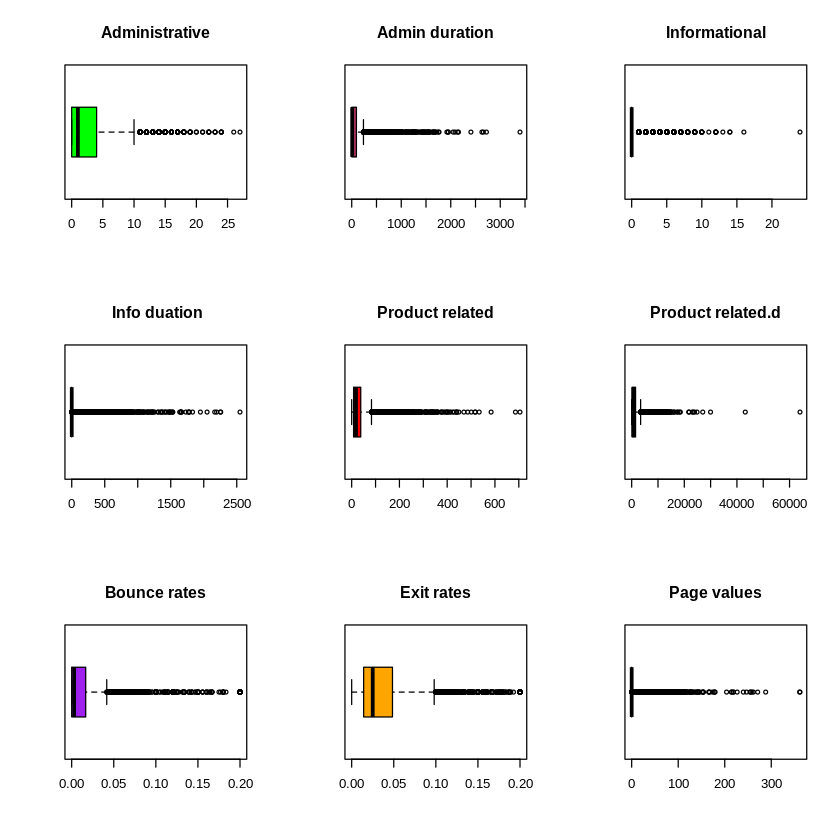

In [26]:
#plotting boxplots for all the numerical variables
par(mfrow=c(3,3))
boxplot((df$`Administrative`),horizontal=TRUE, col='green', main="Administrative")
boxplot((df$`Administrative_Duration`), horizontal =TRUE, col='maroon', main="Admin duration")
boxplot((df$`Informational`),horizontal= TRUE, col='pink', main="Informational")
boxplot((df$`Informational_Duration`),horizontal=TRUE, col='blue', main=" Info duation")
boxplot((df$`ProductRelated`),horizontal=TRUE,col='red', main="Product related")
boxplot((df$`ProductRelated_Duration`),horizontal=TRUE,col='red', main="Product related.d")
boxplot((df$`BounceRates`),horizontal=TRUE,col='purple', main="Bounce rates")
boxplot((df$`ExitRates`),horizontal=TRUE,col='orange', main="Exit rates")
boxplot((df$PageValues),horizontal=TRUE,col='purple', main="Page values")

> There are many outliers in our numerical column which we will not remove because they will alter with a large part of our data.


In [27]:
# Installing libraries
library(tidyverse) # data manipulation
#library(corrplot)
install.packages("corrplot",dependencies=TRUE)
install.packages("gridExtra",dependencies=TRUE)
install.packages("GGally",dependencies=TRUE)
library(cluster) # clustering algorithms 
install.packages("tidyverse",dependencies=TRUE)
install.packages("factoextra",dependencies=TRUE)

library(factoextra) # clustering algorithms & visualization

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘egg’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mvtnorm’, ‘DEoptimR’, ‘png’, ‘jpeg’, ‘checkmate’, ‘coda’, ‘e1071’, ‘pcaPP’, ‘robustbase’, ‘som’, ‘lars’, ‘pls’, ‘mclust’, ‘sp’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘Formula’, ‘latticeExtra’, ‘data.table’, ‘htmlTable’, ‘viridis’, ‘rJava’, ‘statnet.common’, ‘hunspell’, ‘plyr’, ‘reshape’, ‘chemo

# Part five : Performing EDA



## Univaiate Analysis

### b) Statistical Summary

In [28]:
# # Viewing the statistical summary of our dataset
summary(df)

 Administrative  Administrative_Duration Informational    
 Min.   : 0.00   Min.   :  -1.00         Min.   : 0.0000  
 1st Qu.: 0.00   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.00   Median :   9.00         Median : 0.0000  
 Mean   : 2.34   Mean   :  81.68         Mean   : 0.5088  
 3rd Qu.: 4.00   3rd Qu.:  94.75         3rd Qu.: 0.0000  
 Max.   :27.00   Max.   :3398.75         Max.   :24.0000  
                                                          
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  8.00   1st Qu.:  193.6        
 Median :   0.00        Median : 18.00   Median :  609.5        
 Mean   :  34.84        Mean   : 32.06   Mean   : 1207.5        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1477.6        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
                                                                
  Bounce

* The above shows the minimum, maximum, interquartile ranges as well as the mean of all the numerical values.
* For the categorical values, it shows the number of each records. For example, revenue has 10,291 False records and 1908 True records.

### b) Variances and Standard Deviation

In [29]:
# Get Variance of the multiple columns
#
library(dplyr)
df %>% summarise_if(is.numeric, var)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11.09457,31516.25,1.62771,20010.51,1989.241,3686121,0.002061387,0.0021388,348.1132,0.03988432,0.8226229,2.926075,5.771712,16.12675


>The above shows the variances of all the numerical columns ProductRelated_Duration has the highest variance of 3686121, meaning there is a high difference between variables and the mean.

> The smallest variance is in the column bounce rates 0.002061387

In [30]:
# Get the standard deviation of multiple columns
library(dplyr)
df %>% summarise_if(is.numeric, sd)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.330851,177.5282,1.275817,141.4585,44.60091,1919.927,0.0454025,0.04624716,18.65779,0.1997106,0.9069856,1.710578,2.402439,4.015813


> The variable with the smallest standard deviation is duration bounce rates with a sd of 0.0454025.
> The highest standard deviation is that of product related duration of 1919.927

### d) Frequency distribution tables

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



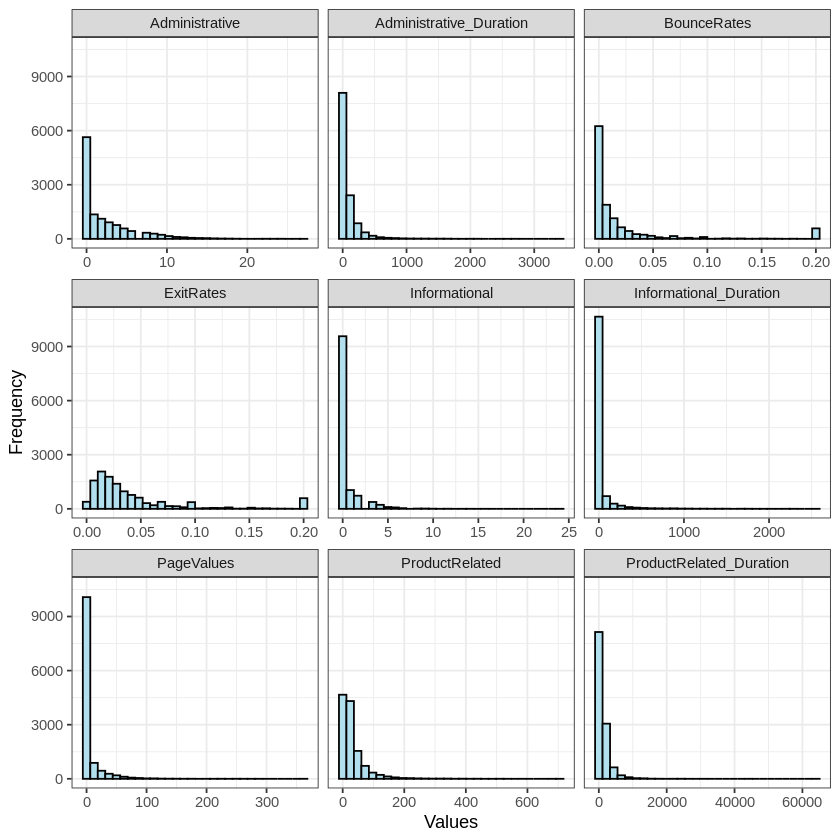

In [31]:
### Frequency distribution tables
df%>%
  gather(attributes, value, 1:9) %>%
  ggplot(aes(x = value)) +
  geom_histogram(fill = 'lightblue2', color = 'black') +
  facet_wrap(~attributes, scales = 'free_x') +
  labs(x="Values", y="Frequency") +
  theme_bw()

* All our numeric variables are skewed to the right since the mode seems to be smaller than the mean and the tail is mostly to the right.

## Bivariate and multivariate Analysis

In [32]:
# Generating a correlation matrix
my_data <- df[, c(1,2,3,4,5,6,7,8,9)]
res <- cor(my_data)
round(res, 2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
Administrative,1.00,0.60,0.38,0.25,0.43,0.37,-0.21,-0.31,0.10
Administrative_Duration,0.60,1.00,0.30,0.24,0.29,0.35,-0.14,-0.20,0.07
Informational,0.38,0.30,1.00,0.62,0.37,0.39,-0.11,-0.16,0.05
Informational_Duration,0.25,0.24,0.62,1.00,0.28,0.35,-0.07,-0.10,0.03
ProductRelated,0.43,0.29,0.37,0.28,1.00,0.86,-0.19,-0.29,0.05
ProductRelated_Duration,0.37,0.35,0.39,0.35,0.86,1.00,-0.17,-0.25,0.05
BounceRates,-0.21,-0.14,-0.11,-0.07,-0.19,-0.17,1.00,0.90,-0.12
ExitRates,-0.31,-0.20,-0.16,-0.10,-0.29,-0.25,0.90,1.00,-0.17
PageValues,0.10,0.07,0.05,0.03,0.05,0.05,-0.12,-0.17,1.00


> There is a high positive correlation between exit rates and bounce rates of 0.9

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependencies ‘graph’, ‘Rgraphviz’ are not available”
also installing the dependencies ‘tmvnsim’, ‘pbivnorm’, ‘numDeriv’, ‘mnormt’, ‘psychTools’, ‘GPArotation’, ‘lavaan’, ‘Rcsdp’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




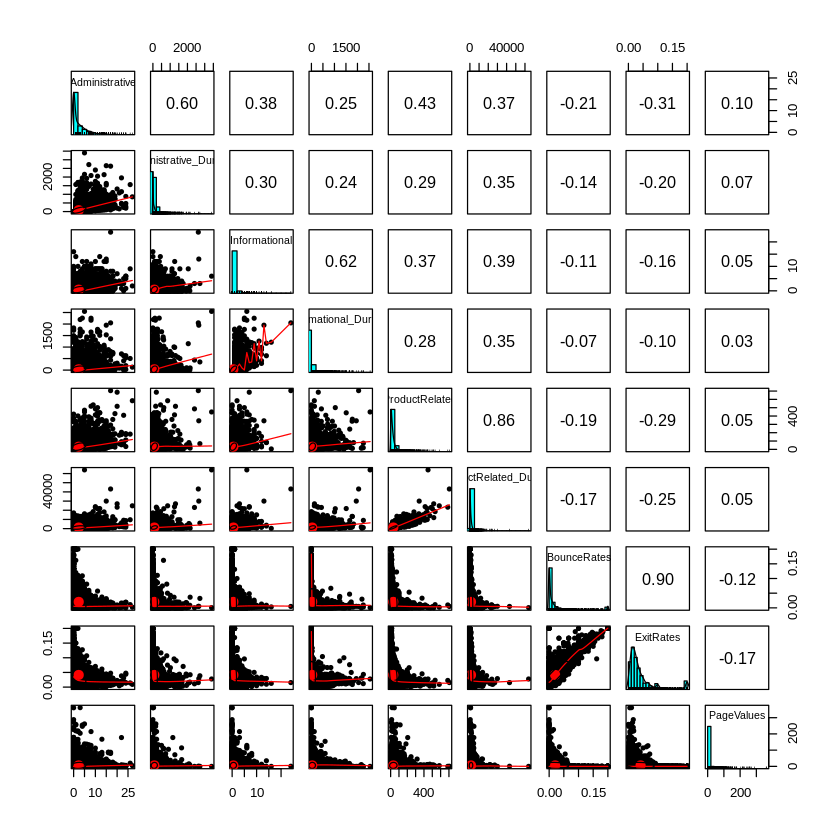

In [33]:
# Plotting our pairplots
 install.packages("psych",dependencies=TRUE)
library(psych)
pairs.panels(df[,c(1:9)])

* As exit rates increase, the bounce rates also increase. 
* Information and inforimational duration as well as administration and administrational duration are positively related.

# Part six: Implement the Solution

## K-Means Clustering

In [42]:
### Preparing our dataset
# Encoding our dataset
df$SpecialDay_new <- as.numeric(as.factor(df$SpecialDay))
df$Month_new <- as.numeric(as.factor(df$Month))
df$OperatingSystems_new <- as.numeric(as.factor(df$OperatingSystems))
df$Browser_new <- as.numeric(as.factor(df$Browser))
df$Region_new <- as.numeric(as.factor(df$Region))
df$TrafficType_new <- as.numeric(as.factor(df$TrafficType))
df$VisitorType_new <- as.numeric(as.factor(df$VisitorType))
df$Weekend_new <- as.numeric(as.factor(df$Weekend))
df$Revenue_new <- as.numeric(as.factor(df$Revenue))
head(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Revenue,SpecialDay_new,Month_new,OperatingSystems_new,Browser_new,Region_new,TrafficType_new,VisitorType_new,Weekend_new,Revenue_new
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,⋯,FALSE,1,3,1,1,1,1,3,1,1
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,⋯,FALSE,1,3,2,2,1,2,3,1,1
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,⋯,FALSE,1,3,4,1,9,3,3,1,1
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,⋯,FALSE,1,3,3,2,2,4,3,1,1
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,⋯,FALSE,1,3,3,3,1,4,3,2,1
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,⋯,FALSE,1,3,2,2,1,3,3,1,1


In [ ]:
## K-Means clustering
### Normalizing our data
# Normalizing the data set so that no particular attribute 
# has more impact on clustering algorithm than others.
# ---
# 
normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}
df$Administrative<- normalize(df$Administrative)
df$Administrative_Duration<- normalize(df$Administrative_Duration)
df$Informational<- normalize(df$Informational)
df$Informational_Duration<- normalize(df$Informational_Duration)
df$ProductRelated<- normalize(df$ProductRelated)
df$ProductRelated_Duration<- normalize(df$ProductRelated_Duration)
df$BounceRates<- normalize(df$BounceRates)
df$ExitRates<- normalize(df$ExitRates)
df$PageValues<- normalize(df$PageValues)
df$SpecialDay_new<- normalize(df$SpecialDay_new)
df$Month_new<- normalize(df$Month_new)
df$OperatingSystems_new<- normalize(df$OperatingSystems_new)
df$Browser_new<- normalize(df$Browser_new)
df$Region_new<- normalize(df$Region_new)
df$TrafficType_new<- normalize(df$TrafficType_new)
df$VisitorType_new<- normalize(df$VisitorType_new)
df$Weekend_new<- normalize(df$Weekend_new)
df$Revenue_new<- normalize(df$Revenue_new)
#
head(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Revenue,SpecialDay_new,Month_new,OperatingSystems_new,Browser_new,Region_new,TrafficType_new,VisitorType_new,Weekend_new,Revenue_new
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.0002941393,0,0.0003920992,0.001418440,1.563122e-05,1.00000000,1.000000,0,0,⋯,FALSE,0,0.2222222,0.0000000,0.00000000,0.000,0.00000000,1,0,0
2,0,0.0002941393,0,0.0003920992,0.002836879,1.016029e-03,0.00000000,0.500000,0,0,⋯,FALSE,0,0.2222222,0.1428571,0.08333333,0.000,0.05263158,1,0,0
3,0,0.0000000000,0,0.0000000000,0.001418440,0.000000e+00,1.00000000,1.000000,0,0,⋯,FALSE,0,0.2222222,0.4285714,0.00000000,1.000,0.10526316,1,0,0
4,0,0.0002941393,0,0.0003920992,0.002836879,5.731448e-05,0.25000000,0.700000,0,0,⋯,FALSE,0,0.2222222,0.2857143,0.08333333,0.125,0.15789474,1,0,0
5,0,0.0002941393,0,0.0003920992,0.014184397,9.824223e-03,0.10000000,0.250000,0,0,⋯,FALSE,0,0.2222222,0.2857143,0.16666667,0.000,0.15789474,1,1,0
6,0,0.0002941393,0,0.0003920992,0.026950355,2.426226e-03,0.07894737,0.122807,0,0,⋯,FALSE,0,0.2222222,0.1428571,0.08333333,0.000,0.10526316,1,0,0


> Our data is normalized

In [ ]:
df.new<- df[, c(1, 2, 3, 4, 5, 6, 7, 8, 9,19,20,21,22,23,24,25,26,27)]
colnames(df.new)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay_new"         
[11] "Month_new"               "OperatingSystems_new"   
[13] "Browser_new"             "Region_new"             
[15] "TrafficType_new"         "VisitorType_new"        
[17] "Weekend_new"             "Revenue_new"

In [ ]:
# Applying the K-means clustering algorithm with no. of centroids(k)=4
# Starting with a seed of 100
set.seed(123)
# Applying formula
df_K3 <- kmeans(df.new, centers = 3, nstart = 25)
print(df_K3)

K-means clustering with 3 clusters of sizes 7934, 1908, 2357

Cluster means:
  Administrative Administrative_Duration Informational Informational_Duration
1     0.07767788              0.02164292    0.01786089             0.01164073
2     0.12568911              0.03543885    0.03275681             0.02298149
3     0.08534075              0.02433101    0.02308726             0.01493915
  ProductRelated ProductRelated_Duration BounceRates  ExitRates  PageValues
1     0.04054371              0.01678013  0.12094636 0.23482361 0.005637927
2     0.06838322              0.02934308  0.02558576 0.09777584 0.075365536
3     0.04351968              0.01753270  0.10129086 0.20426369 0.005173920
  SpecialDay_new Month_new OperatingSystems_new Browser_new Region_new
1     0.07096042 0.5622917            0.1610429   0.1149798  0.2715213
2     0.02316562 0.6231074            0.1561096   0.1211129  0.2602856
3     0.06313110 0.5747890            0.1628584   0.1006930  0.2684026
  TrafficType_new Visit

* The above shows that our clusters are of sizes 7934, 1908 and 2357 respectively.
* It shows the vectors formed.
* It shows the within cluster sum of squares, "The within-cluster sum of squares is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares. Clusters that have higher values exhibit greater variability of the observations within the cluster."- (https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/cluster-k-means/interpret-the-results/all-statistics-and-graphs/#:~:text=The%20within%2Dcluster%20sum%20of%20squares%20is%20a%20measure%20of,a%20large%20sum%20of%20squares.)
* The above means that the last two clusters have smaller variability within the cluster given the total variance is 69.8% explained by the dataset.


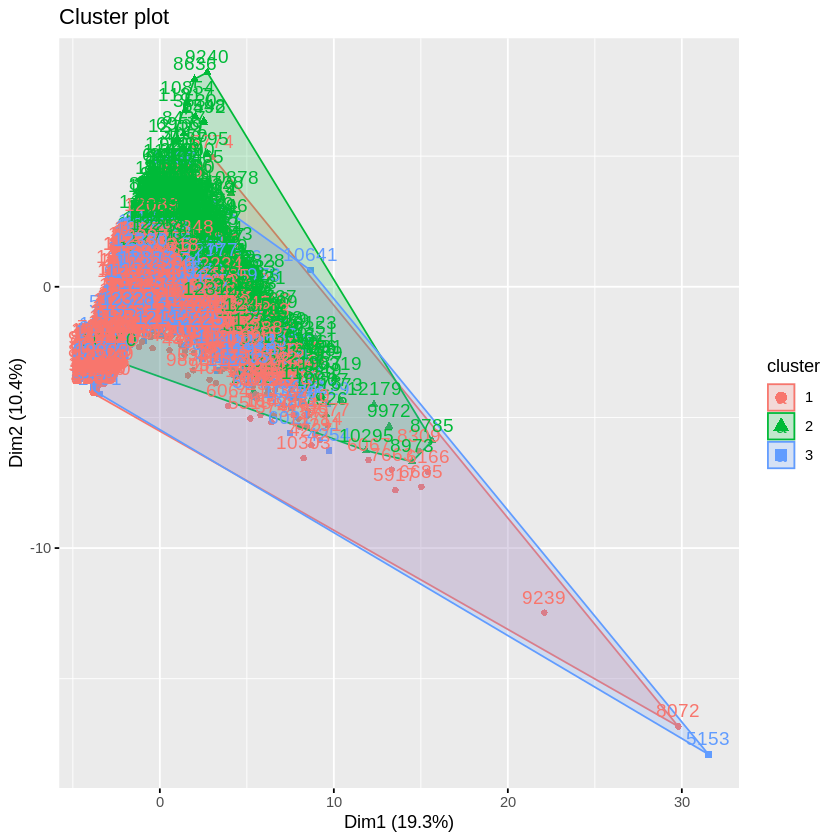

In [ ]:
### Visualizing our clusters
# Using fviz to show our clusters
fviz_cluster(df_K3, data = df.new)

> The above shows clustering of our points

In [ ]:
### Showing where each of our data points have been clustered
# Clusters to which each point is associated
df_K3$cluster


1     2     3     4     5     6     7     8     9    10    11    12    13 
    1     1     1     1     3     1     1     3     1     1     1     1     1 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    1     1     1     1     3     1     1     3     1     1     1     3     1 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    1     1     1     1     1     3     1     1     1     1     3     1     1 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    1     1     1     1     1     1     1     1     1     1     1     3     1 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    3     1     1     1     1     1     1     1     1     1     1     3     1 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    2     1     1     1     1     1     1     1     1     1     1     2     1 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    3     1     3     1     1     1     3     1     1     1     1     1     1 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    3     1     1     1     1     1     1     1     1     1     2     1     1 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    1     1     1     1     1     1     1     1     1     1     1     3     1 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    3     1     1     1     1     1     1     1     1     1     1     1     1 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    1     1     1     1     1     1     1     1     1     1     1     1     3 
  157   158   160   161   162   163   164   165   166   167   168   169   170 
    3     3     1     1     3     3     1     1     1     1     1     1     3 
  171   172   173   174   175   176   177   178   180   181   182   183   184 
    3     1     1     3     3     1     1     1     1     3     1     1     3 
  185   186   187   188   189   190   191   192   193   194   195   196   197 
    1     1     1     3     2     1     1     1     1     1     3     1     2 
  198   199   200   201   202   203   204   205   206   207   208   209   210 
    1     2     2     2     3     1     1     1     1     2     3     1     1 
  211   212   213   214   215   216   217   218   219   220   221   222   223 
    1     1     1     3     1     1     1     1     1     1     2     1     1 
  224   225   226   227   228   229   230   231   232   233   234   235   236 
    1     1     3     1     1     2     1     3     1     3     3     3     1 
  237   238   239   240   241   242   243   244   245   246   247   248   249 
    3     3     3     1     1     1     1     3     1     1     1     1     2 
  250   251   252   253   254   255   256   257   258   259   260   261   262 
    3     3     1     1     1     3     1     1     1     1     1     3     1 
  263   264   265   266   267   268   269   270   271   272   273   274   275 
    2     1     1     2     1     1     1     3     3     1     1     1     3 
  276   277   278   279   280   281   282   283   284   285   286   287   288 
    1     2     1     1     1     3     2     1     1     1     1     1     1 
  289   290   291   292   293   294   295   296   297   298   299   300   301 
    1     1     1     1     1     3     2     2     1     1     1     1     3 
  302   303   304   305   306   307   308   309   310   311   312   313   314 
    3     1     1     1     1     3     1     1     3     1     3     1     1 
  315   316   317   318   319   320   321   322   323   324   325   326   327 
    1     1     1     1     1     1     2     1     1     1     1     1     1 
  328   329   330   331   332   333   334   335   336 

> The above shows how each data point has been clustered

In [ ]:
### Showing the cluster centres
# Cluster centers of each variable per cluster
df_K2$centers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay_new,Month_new,OperatingSystems_new,Browser_new,Region_new,TrafficType_new,VisitorType_new,Weekend_new,Revenue_new
1,0.07767788,0.02164292,0.01786089,0.01164073,0.04054371,0.01678013,0.12094636,0.23482361,0.005637927,0.07096042,0.5622917,0.1610429,0.1149798,0.2715213,0.1628501,0.8832241,0.0000000,0
2,0.12568911,0.03543885,0.03275681,0.02298149,0.06838322,0.02934308,0.02558576,0.09777584,0.075365536,0.02316562,0.6231074,0.1561096,0.1211129,0.2602856,0.1590257,0.7746331,0.2615304,1
3,0.08534075,0.02433101,0.02308726,0.01493915,0.04351968,0.01753270,0.10129086,0.20426369,0.005173920,0.06313110,0.5747890,0.1628584,0.1006930,0.2684026,0.1606190,0.8400509,1.0000000,0


> The above shows the centre of each cluster per variable

In [ ]:
### Visualizing using different Ks to compare
# Creating clusters of different numbers
df_K2 <- kmeans(df.new, centers = 2, nstart = 25)
df_K3 <- kmeans(df.new, centers = 3, nstart = 25)
df_K4 <- kmeans(df.new, centers = 4, nstart = 25)
df_K5 <- kmeans(df.new, centers = 5, nstart = 25)

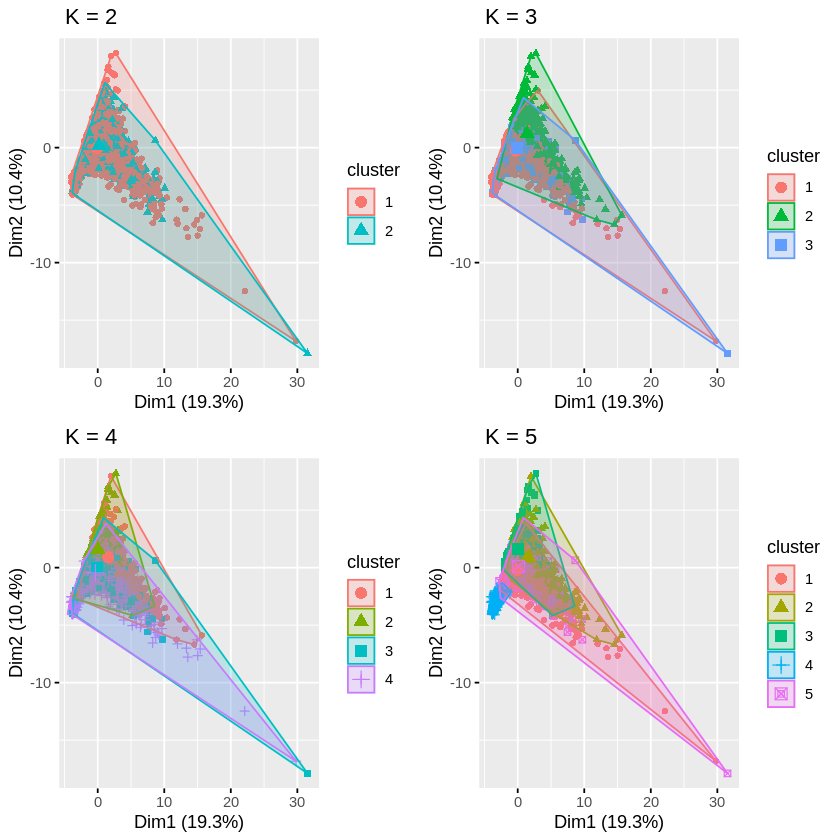

In [ ]:
# Applying the clusters created above and visualizing them
p1 <- fviz_cluster(df_K2, geom = "point", data = df.new) + ggtitle(" K = 2")
p2 <- fviz_cluster(df_K3, geom = "point", data = df.new) + ggtitle(" K = 3")
p3 <- fviz_cluster(df_K4, geom = "point", data = df.new) + ggtitle(" K = 4")
p4 <- fviz_cluster(df_K5, geom = "point", data = df.new) + ggtitle(" K = 5")

grid.arrange(p1, p2, p3, p4, nrow = 2)

> From the visualization above, K = 4 and five have so much overlapping variables which is not appopriate therefore the best K could be either 2 or 3.

## Hierarchical Clustering

In [ ]:
### We first scale our data
# Selecting our data once again
df.o<- df[, c(1, 2, 3, 4, 5, 6, 7, 8, 9,19,20,21,22,23,24,25,26,27)]
# Scaling our data
df.0 <- scale(df.n)
# Previewing the data
head(df.o)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay_new,Month_new,OperatingSystems_new,Browser_new,Region_new,TrafficType_new,VisitorType_new,Weekend_new,Revenue_new
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.0002941393,0,0.0003920992,0.001418440,1.563122e-05,1.00000000,1.000000,0,0,0.2222222,0.0000000,0.00000000,0.000,0.00000000,1,0,0
2,0,0.0002941393,0,0.0003920992,0.002836879,1.016029e-03,0.00000000,0.500000,0,0,0.2222222,0.1428571,0.08333333,0.000,0.05263158,1,0,0
3,0,0.0000000000,0,0.0000000000,0.001418440,0.000000e+00,1.00000000,1.000000,0,0,0.2222222,0.4285714,0.00000000,1.000,0.10526316,1,0,0
4,0,0.0002941393,0,0.0003920992,0.002836879,5.731448e-05,0.25000000,0.700000,0,0,0.2222222,0.2857143,0.08333333,0.125,0.15789474,1,0,0
5,0,0.0002941393,0,0.0003920992,0.014184397,9.824223e-03,0.10000000,0.250000,0,0,0.2222222,0.2857143,0.16666667,0.000,0.15789474,1,1,0
6,0,0.0002941393,0,0.0003920992,0.026950355,2.426226e-03,0.07894737,0.122807,0,0,0.2222222,0.1428571,0.08333333,0.000,0.10526316,1,0,0


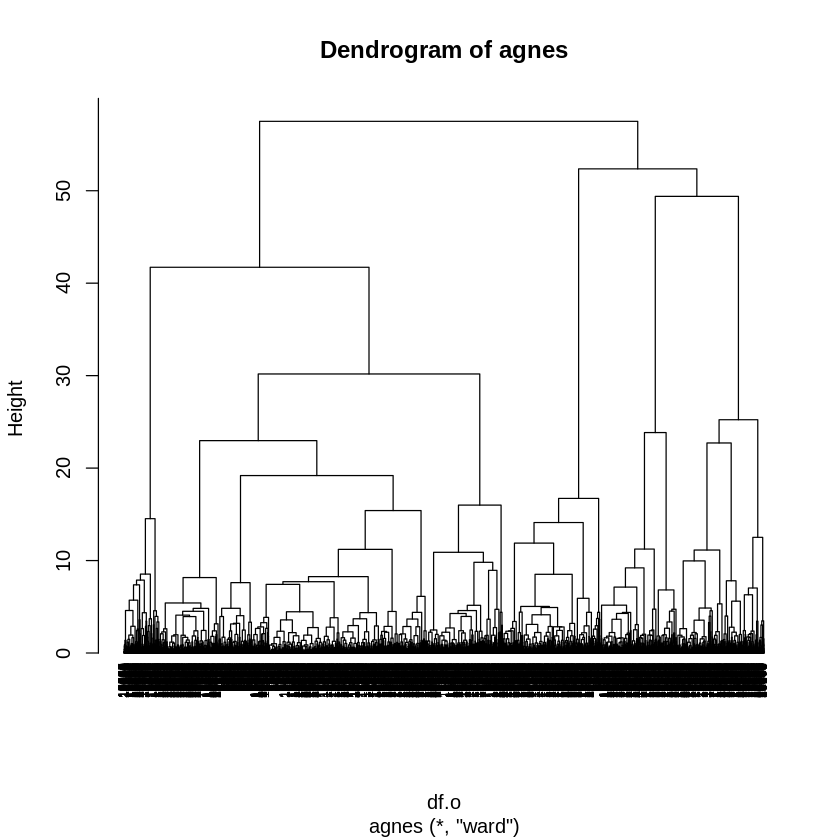

In [ ]:
hc3 <- agnes(df.o, method = "ward")
pltree(hc3, cex = 0.6, hang = -1, main = "Dendrogram of agnes")

Our data is clustered, however, it does not shown clearly how our data has been clustered probably due to how large our dataset was.

## Conclusion ( Strengths and Weaknesses)

---
*  K-means is good at visualizing the various clusters in the dataset, however,  it is a bit cumbersome since one has to manually select a K.
* Hierarchical clustering is unable to entirely show the grouped data since we have used a very large dataset.

# Part seven: Challenge the Solution (DBSCAN)



In [37]:
# Importing the required package
# 
install.packages("dbscan", dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘gdata’, ‘caTools’, ‘modeltools’, ‘TTR’, ‘gplots’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘kernlab’, ‘xts’, ‘quantmod’, ‘zoo’, ‘ROCR’, ‘fpc’, ‘microbenchmark’, ‘DMwR’




In [39]:
# Loading the required library
# 
library("dbscan")

In [46]:
# Encoding our dataset
df$SpecialDay_new <- as.numeric(as.factor(df$SpecialDay))
df$Month_new <- as.numeric(as.factor(df$Month))
df$OperatingSystems_new <- as.numeric(as.factor(df$OperatingSystems))
df$Browser_new <- as.numeric(as.factor(df$Browser))
df$Region_new <- as.numeric(as.factor(df$Region))
df$TrafficType_new <- as.numeric(as.factor(df$TrafficType))
df$VisitorType_new <- as.numeric(as.factor(df$VisitorType))
df$Weekend_new <- as.numeric(as.factor(df$Weekend))
df$Revenue_new <- as.numeric(as.factor(df$Revenue))
head(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Revenue,SpecialDay_new,Month_new,OperatingSystems_new,Browser_new,Region_new,TrafficType_new,VisitorType_new,Weekend_new,Revenue_new
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,⋯,FALSE,1,3,1,1,1,1,3,1,1
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,⋯,FALSE,1,3,2,2,1,2,3,1,1
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,⋯,FALSE,1,3,4,1,9,3,3,1,1
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,⋯,FALSE,1,3,3,2,2,4,3,1,1
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,⋯,FALSE,1,3,3,3,1,4,3,2,1
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,⋯,FALSE,1,3,2,2,1,3,3,1,1


In [52]:
# Removing the class label 

#
m1 <- df[, c(1, 2, 3, 4, 5, 6, 7, 8, 9,19,20,21,22,23,24,25,26)]

head(m1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay_new,Month_new,OperatingSystems_new,Browser_new,Region_new,TrafficType_new,VisitorType_new,Weekend_new
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,1,3,1,1,1,1,3,1
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,1,3,2,2,1,2,3,1
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,1,3,4,1,9,3,3,1
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,1,3,3,2,2,4,3,1
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,1,3,3,3,1,4,3,2
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,1,3,2,2,1,3,3,1


In [55]:
# Applying our DBSCAN algorithm with minimum points of 4
# 
db<-dbscan(m1,eps=0.4,MinPts = 3)

Warning message in dbscan(m1, eps = 0.4, MinPts = 3):
“converting argument MinPts (fpc) to minPts (dbscan)!”


In [56]:
# Printing out the clustering results
print(db)

DBSCAN clustering for 12199 objects.
Parameters: eps = 0.4, minPts = 3
The clustering contains 0 cluster(s) and 12199 noise points.

    0 
12199 

Available fields: cluster, eps, minPts


We got 0 clusters and 3 minimum points

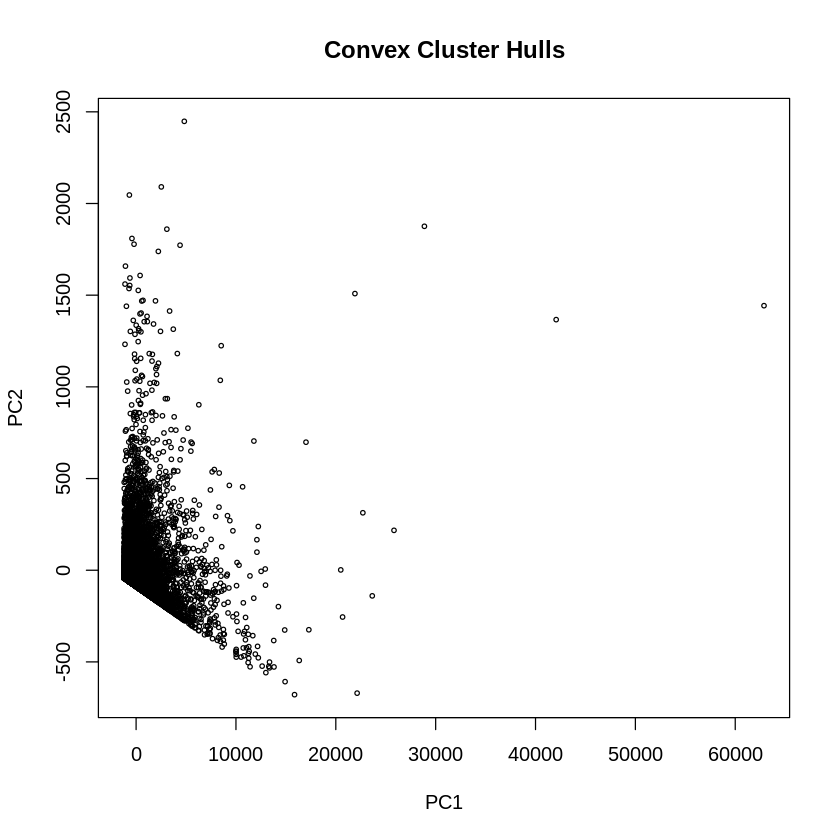

In [57]:
# Plotting our clusters
# 
hullplot(m1,db$cluster)

# Part Eight : Follow up questions

---

* Did we have the right data ? Yes we did and we got to use all the variables to cluster our customers.

* Was our objective attained? Yes it was we got to cluster our data well using the K-means clustering.